In [1]:
import pandas as pd
import requests
import sqlite3

In [2]:
def get_listings():
    """Returns a list of all listings."""
    # Connect to the database.
    db = sqlite3.connect("db/listings.db")
    cursor = db.cursor()

    # Get all listings from the database.
    cursor.execute("SELECT * FROM listings")

    # Create a list of all listings.
    listings = []
    for row in cursor.fetchall():
        listings.append(row)

    # Close the connection to the database.
    db.close()

    # Return the list of listings.
    return listings

items = get_listings()

In [3]:
df = pd.DataFrame(items, columns=["id", "title","price", "link"])
df["price"] = df["price"].apply(lambda p: int(p.replace('$', '').replace(',', '')))
df = df[["title", "price", "link"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109240 entries, 0 to 109239
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   109240 non-null  object
 1   price   109240 non-null  int64 
 2   link    109240 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [5]:
df = df[df["price"] != 0]
df = df.sort_values("price", ascending=False)

In [13]:
make = "2018 Ford F150"
tdf = df[df["title"].str.contains(make, case=False)]

In [14]:
tdf

,title,price,link
5257,2018 Ford F150 SuperCrew Cab Platinum Pickup 4...,44995,https://anchorage.craigslist.org/ctd/d/anchora...
5224,2018 Ford F150 SuperCrew Cab Platinum Pickup 4...,44995,https://anchorage.craigslist.org/ctd/d/anchora...
5269,2018 Ford F150 SuperCrew Cab Platinum Pickup 4...,44995,https://anchorage.craigslist.org/ctd/d/anchora...
5262,2018 Ford F150 SuperCrew Cab Platinum Pickup 4...,44995,https://anchorage.craigslist.org/ctd/d/anchora...
2208,2018 Ford F150 SuperCrew Cab Limited Pickup 4D...,43995,https://anchorage.craigslist.org/ctd/d/anchora...
...,...,...,...
15216,2018 Ford F150 F-150 SuperCrew FX4 139K Miles ...,19980,https://athensga.craigslist.org/ctd/d/houston-...
28046,2018 FORD F150 XL > CALL NOW! (909)>587>21>24...,17975,https://bakersfield.craigslist.org/ctd/d/baker...
28080,2018 FORD F150 XL > CALL NOW! (909)>587>21>24...,17975,https://bakersfield.craigslist.org/ctd/d/baker...
28081,2018 FORD F150 XL > CALL NOW! (909)>587>21>24...,17975,https://bakersfield.craigslist.org/ctd/d/baker...


30412.442953020134


<Axes: ylabel='Frequency'>

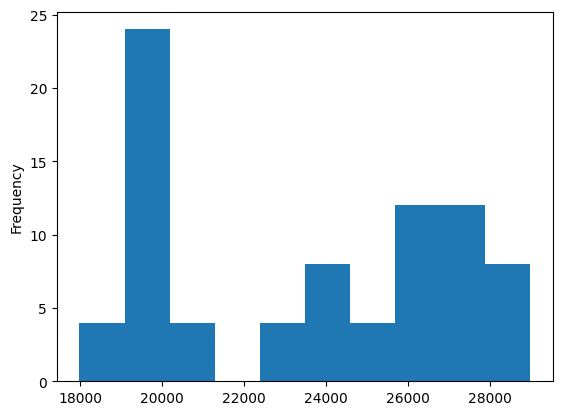

In [15]:
print(tdf["price"].mean())
tdf = tdf[tdf["price"] < 30000]
tdf = tdf[tdf["price"] > 1000]
# tdf.info()
tdf["price"].plot(kind="hist",bins=10)

In [38]:
tdf.loc[17708]["link"]

'https://appleton.craigslist.org/cto/d/oshkosh-2014-mercedes-e350-wagon-4matic/7694662725.html'